# Do-Calculus Rules

This notebook reviews the rules of *do-calculus* providing explanation and examples, mainly following the neat explanations at [1] and [2].

In [1]:
import networkx as nx

## Rule 1

**Ignoring observations.**
An observation $z$ can be ignored if the outcome $y$ is independent from the observation given other relevant observations $w$ and intervention $x$ (in the intervened graph).

If 
$$ (Y \perp Z \vert W,X)_{G_\overline{X}} $$
then
$$ P(y \vert z, do(x), w) = P(y \vert do(x), w) $$

Here $G_{\overline{X}}$ is in the graph in which all nodes $X$ lose their incoming edges.

Thus, an observation that is cut out from the outcome by conditioning and/or intervening can be dropped.

Rule 1 can be seen as a generalization of the d-separation criterion [3].

### Example 1

Let the base $G$ be:

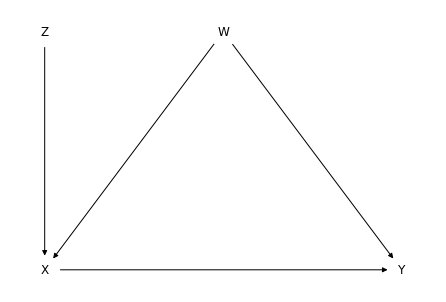

In [2]:
G = nx.DiGraph()
G.graph['dpi'] = 120

nodes = ['X', 'Y', 'Z', 'W']
edges = [('Z','X'), ('X','Y'), ('W','X'), ('W','Y')]
nodes_pos = {'Z':(-1, 1), 'X':(-1, -1), 'W':(0, 1), 'Y':(1, -1)}
nodes_lbl = {'Z':'Z', 'X':'X', 'W':'W', 'Y':'Y'}

G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G,nodes_pos,node_size=800,node_color='white')
_ = nx.draw_networkx_labels(G,nodes_pos,nodes_lbl)

In order to verify if $P(Y\vert Z, do(X), W) = P(Y\vert do(X), W)$ we generate $G_{\overline{X}}$:

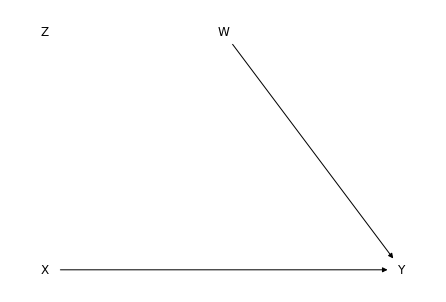

In [3]:
G = nx.DiGraph()
G.graph['dpi'] = 120

nodes = ['X', 'Y', 'Z', 'W']
edges = [('X','Y'), ('W','Y')]
nodes_pos = {'Z':(-1, 1), 'X':(-1, -1), 'W':(0, 1), 'Y':(1, -1)}
nodes_lbl = {'Z':'Z', 'X':'X', 'W':'W', 'Y':'Y'}

G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G,nodes_pos,node_size=800,node_color='white')
_ = nx.draw_networkx_labels(G,nodes_pos,nodes_lbl)

In the graph it is clear that $Y \perp Z \vert X,W$, so Rule 1 holds.

### Example 2

Let the base $G$ be:

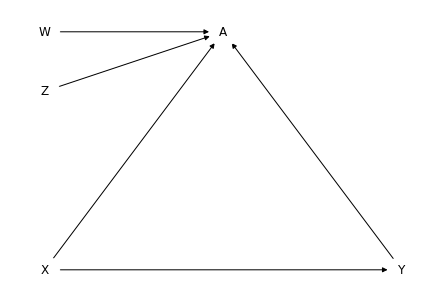

In [4]:
G = nx.DiGraph()
G.graph['dpi'] = 120

nodes = ['X', 'Y', 'Z', 'W', 'A']
edges = [('X','A'), ('X','Y'), ('Y','A'), ('Z','A'), ('W','A')]
nodes_pos = {'A':(0, 1), 'X':(-1, -1), 'W':(-1, 1), 'Y':(1, -1), 'Z':(-1, 0.5)}
nodes_lbl = {'Z':'Z', 'X':'X', 'W':'W', 'Y':'Y', 'A':'A'}

G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G,nodes_pos,node_size=800,node_color='white')
_ = nx.draw_networkx_labels(G,nodes_pos,nodes_lbl)

In order to verify if $P(Y\vert Z, do(X), W) = P(Y\vert do(X), W)$ we generate $G_{\overline{X}}$:

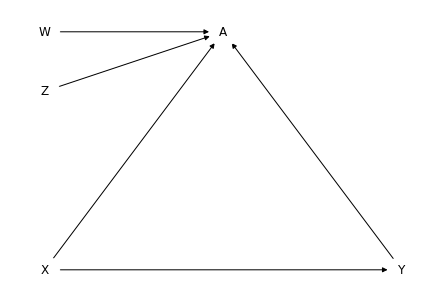

In [5]:
G = nx.DiGraph()
G.graph['dpi'] = 120

nodes = ['X', 'Y', 'Z', 'W', 'A']
edges = [('X','A'), ('X','Y'), ('Y','A'), ('Z','A'), ('W','A')]
nodes_pos = {'A':(0, 1), 'X':(-1, -1), 'W':(-1, 1), 'Y':(1, -1), 'Z':(-1, 0.5)}
nodes_lbl = {'Z':'Z', 'X':'X', 'W':'W', 'Y':'Y', 'A':'A'}

G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G,nodes_pos,node_size=800,node_color='white')
_ = nx.draw_networkx_labels(G,nodes_pos,nodes_lbl)

In the graph, $Y \perp Z \vert X,W$ because the path from $Z$ to $Y$ is blocked by the collider $A$. So Rule 1 holds.

### Example 3

Let the base $G$ be:

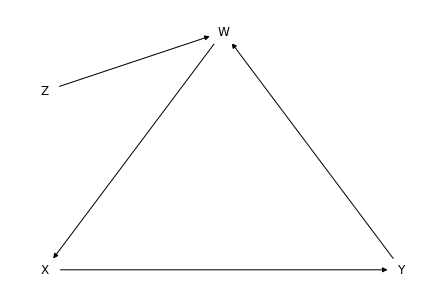

In [6]:
G = nx.DiGraph()
G.graph['dpi'] = 120

nodes = ['X', 'Y', 'Z', 'W',]
edges = [('W','X'), ('X','Y'), ('Y','W'), ('Z','W')]
nodes_pos = {'X':(-1, -1), 'W':(0, 1), 'Y':(1, -1), 'Z':(-1, 0.5)}
nodes_lbl = {'Z':'Z', 'X':'X', 'W':'W', 'Y':'Y'}

G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G,nodes_pos,node_size=800,node_color='white')
_ = nx.draw_networkx_labels(G,nodes_pos,nodes_lbl)

In order to verify if $P(Y\vert Z, do(X), W) = P(Y\vert do(X), W)$ we generate $G_{\overline{X}}$:

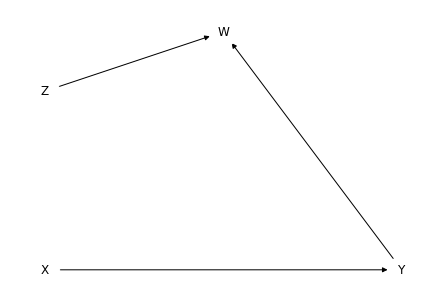

In [7]:
G = nx.DiGraph()
G.graph['dpi'] = 120

nodes = ['X', 'Y', 'Z', 'W',]
edges = [('X','Y'), ('Y','W'), ('Z','W')]
nodes_pos = {'X':(-1, -1), 'W':(0, 1), 'Y':(1, -1), 'Z':(-1, 0.5)}
nodes_lbl = {'Z':'Z', 'X':'X', 'W':'W', 'Y':'Y'}

G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G,nodes_pos,node_size=800,node_color='white')
_ = nx.draw_networkx_labels(G,nodes_pos,nodes_lbl)

In the graph, it is **not** true that $Y \perp Z \vert X,W$ as the conditioning on $W$ opens a path from $Z$ to $Y$. Thus, Rule 1 does **not** hold.

## Rule 2

**Transforming intervention into observation.**
An intervention $z$ can be reduced to an observation if the outcome $y$ is independent from $z$ given other relevant observations $w$ and interventions $x$ (in the properly intervened graph).

If 
$$ (Y \perp Z \vert W,X)_{G_{\overline{X},\underline{Z}}} $$
then
$$ P(y \vert do(z), do(x), w) = P(y \vert z, do(x), w) $$

Here $G_{\underline{Z}}$ is in the graph in which all nodes $Z$ lose their outgoing edges.

Thus, an intervention can be treated as an observation only if it affects the outcome directly.

Rule 2 can be seen as a generalization of the backdoor criterion [3].

### Example 1

Let the base $G$ be:

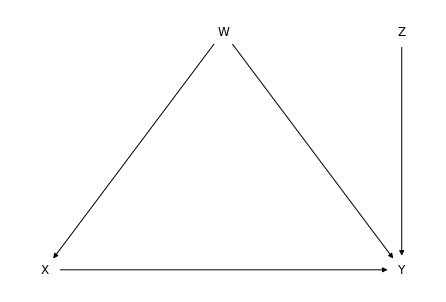

In [8]:
G = nx.DiGraph()
G.graph['dpi'] = 120

nodes = ['X', 'Y', 'Z', 'W']
edges = [('Z','Y'), ('X','Y'), ('W','X'), ('W','Y')]
nodes_pos = {'Z':(1, 1), 'X':(-1, -1), 'W':(0, 1), 'Y':(1, -1)}
nodes_lbl = {'Z':'Z', 'X':'X', 'W':'W', 'Y':'Y'}

G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G,nodes_pos,node_size=800,node_color='white')
_ = nx.draw_networkx_labels(G,nodes_pos,nodes_lbl)

In order to verify if $P(Y\vert do(Z), do(X), W) = P(Y\vert Z, do(X), W)$ we generate $G_{\overline{X},\underline{Z}}$:

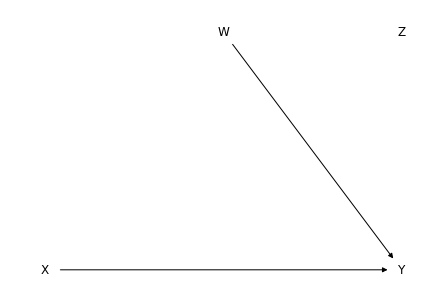

In [9]:
G = nx.DiGraph()
G.graph['dpi'] = 120

nodes = ['X', 'Y', 'Z', 'W']
edges = [('X','Y'), ('W','Y')]
nodes_pos = {'Z':(1, 1), 'X':(-1, -1), 'W':(0, 1), 'Y':(1, -1)}
nodes_lbl = {'Z':'Z', 'X':'X', 'W':'W', 'Y':'Y'}

G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G,nodes_pos,node_size=800,node_color='white')
_ = nx.draw_networkx_labels(G,nodes_pos,nodes_lbl)

In the graph it is clear that $Y \perp Z \vert X,W$, so Rule 2 holds.

### Example 2

Let the base $G$ be:

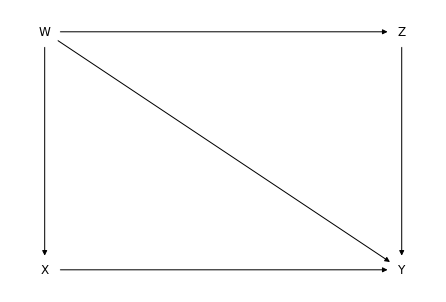

In [10]:
G = nx.DiGraph()
G.graph['dpi'] = 120

nodes = ['X', 'Y', 'Z', 'W']
edges = [('Z','Y'), ('X','Y'), ('W','Y'), ('W','Z'),('W','X')]
nodes_pos = {'X':(-1, -1), 'W':(-1, 1), 'Y':(1, -1), 'Z':(1, 1)}
nodes_lbl = {'Z':'Z', 'X':'X', 'W':'W', 'Y':'Y'}

G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G,nodes_pos,node_size=800,node_color='white')
_ = nx.draw_networkx_labels(G,nodes_pos,nodes_lbl)

In order to verify if $P(Y\vert do(Z), do(X), W) = P(Y\vert Z, do(X), W)$ we generate $G_{\overline{X},\underline{Z}}$:

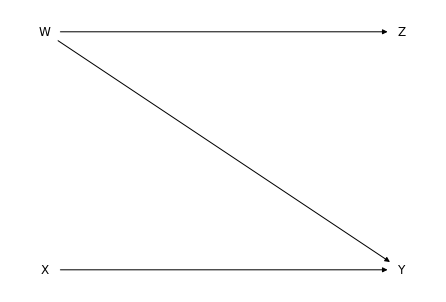

In [11]:
G = nx.DiGraph()
G.graph['dpi'] = 120

nodes = ['X', 'Y', 'Z', 'W']
edges = [('X','Y'), ('W','Y'), ('W','Z')]
nodes_pos = {'X':(-1, -1), 'W':(-1, 1), 'Y':(1, -1), 'Z':(1, 1)}
nodes_lbl = {'Z':'Z', 'X':'X', 'W':'W', 'Y':'Y'}

G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G,nodes_pos,node_size=800,node_color='white')
_ = nx.draw_networkx_labels(G,nodes_pos,nodes_lbl)

In the graph, it is **not** true that $Y \perp Z \vert X,W$ as the conditioning on $W$ opens a path from $Z$ to $Y$. Thus, Rule 2 does **not** hold.

### Example 3

Let the base $G$ be:

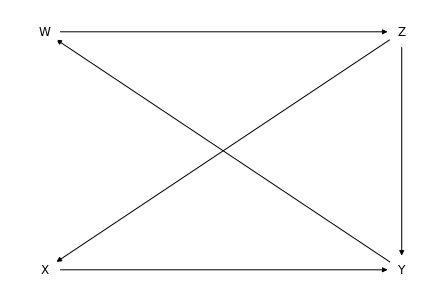

In [12]:
G = nx.DiGraph()
G.graph['dpi'] = 120

nodes = ['X', 'Y', 'Z', 'W']
edges = [('Z','Y'), ('X','Y'), ('Y','W'), ('W','Z'),('Z','X')]
nodes_pos = {'X':(-1, -1), 'W':(-1, 1), 'Y':(1, -1), 'Z':(1, 1)}
nodes_lbl = {'Z':'Z', 'X':'X', 'W':'W', 'Y':'Y'}

G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G,nodes_pos,node_size=800,node_color='white')
_ = nx.draw_networkx_labels(G,nodes_pos,nodes_lbl)

In order to verify if $P(Y\vert do(Z), do(X), W) = P(Y\vert Z, do(X), W)$ we generate $G_{\overline{X},\underline{Z}}$:

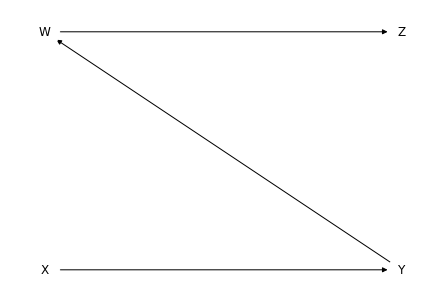

In [13]:
G = nx.DiGraph()
G.graph['dpi'] = 120

nodes = ['X', 'Y', 'Z', 'W']
edges = [('X','Y'), ('Y','W'), ('W','Z')]
nodes_pos = {'X':(-1, -1), 'W':(-1, 1), 'Y':(1, -1), 'Z':(1, 1)}
nodes_lbl = {'Z':'Z', 'X':'X', 'W':'W', 'Y':'Y'}

G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G,nodes_pos,node_size=800,node_color='white')
_ = nx.draw_networkx_labels(G,nodes_pos,nodes_lbl)

In the graph, $Y \perp Z \vert X,W$ because the path from $Z$ to $Y$ is blocked by $W$. So Rule 2 holds.

## Rule 3

**Ignoring interventions**
An intervention $z$ can be ignored if the outcome $y$ is independent from $z$ given other relevant observations $w$ and interventions $x$ (in the properly intervened graph).

If 
$$ (Y \perp Z \vert W,X)_{G_{\overline{X},\overline{Z(W)}}} $$
then
$$ P(y \vert do(z), do(x), w) = P(y \vert do(x), w) $$

Here $G_{\overline{Z(W)}}$ is in the graph in which all nodes $Z$ that are not ancestors of $W$ lose their incoming edges.

Thus, an intervention can be ignored only if does not affect the outcome through any path.

### Example 1

Let the base $G$ be:

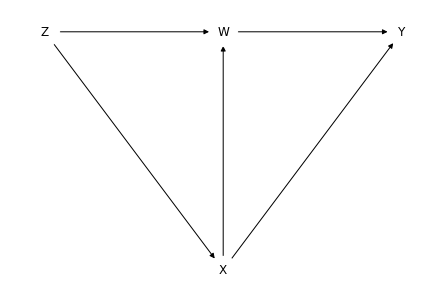

In [14]:
G = nx.DiGraph()
G.graph['dpi'] = 120

nodes = ['X', 'Y', 'Z', 'W']
edges = [('Z','W'), ('Z','X'), ('X','W'), ('X','Y'), ('W','Y')]
nodes_pos = {'Z':(-1, 1), 'X':(0, -1), 'W':(0, 1), 'Y':(1, 1)}
nodes_lbl = {'Z':'Z', 'X':'X', 'W':'W', 'Y':'Y'}

G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G,nodes_pos,node_size=800,node_color='white')
_ = nx.draw_networkx_labels(G,nodes_pos,nodes_lbl)

In order to verify if $P(Y\vert do(Z), do(X), W) = P(Y\vert do(X), W)$ we generate $G_{\overline{X},\overline{Z(W)}}$:

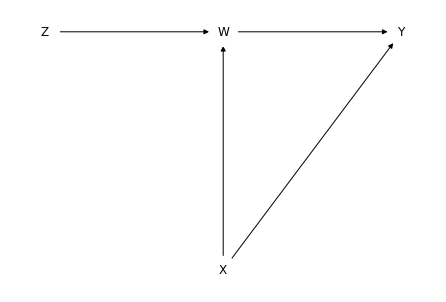

In [15]:
G = nx.DiGraph()
G.graph['dpi'] = 120

nodes = ['X', 'Y', 'Z', 'W']
edges = [('Z','W'), ('X','W'), ('X','Y'), ('W','Y')]
nodes_pos = {'Z':(-1, 1), 'X':(0, -1), 'W':(0, 1), 'Y':(1, 1)}
nodes_lbl = {'Z':'Z', 'X':'X', 'W':'W', 'Y':'Y'}

G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G,nodes_pos,node_size=800,node_color='white')
_ = nx.draw_networkx_labels(G,nodes_pos,nodes_lbl)

In the graph, we have that $Y \perp Z \vert X,W$ since the path $Z \rightarrow W \rightarrow Y$ is blocked by conditioning on $W$, and the path $Z \rightarrow W \leftarrow X \rightarrow Y$ is blocked by conditioning on $X$. In conclusion, Rule 3 holds.

### Example 2

Let the base $G$ be:

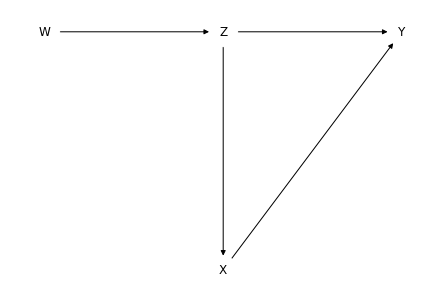

In [16]:
G = nx.DiGraph()
G.graph['dpi'] = 120

nodes = ['X', 'Y', 'Z', 'W']
edges = [('W','Z'), ('Z','X'), ('X','Y'), ('Z','Y')]
nodes_pos = {'Z':(0, 1), 'X':(0, -1), 'W':(-1, 1), 'Y':(1, 1)}
nodes_lbl = {'Z':'Z', 'X':'X', 'W':'W', 'Y':'Y'}

G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G,nodes_pos,node_size=800,node_color='white')
_ = nx.draw_networkx_labels(G,nodes_pos,nodes_lbl)

In order to verify if $P(Y\vert do(Z), do(X), W) = P(Y\vert do(X), W)$ we generate $G_{\overline{X},\overline{Z(W)}}$:

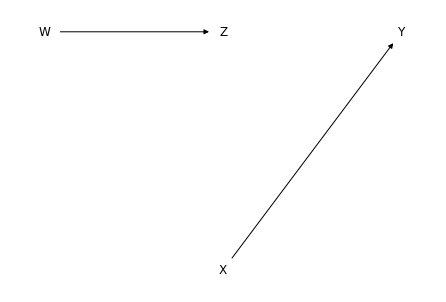

In [17]:
G = nx.DiGraph()
G.graph['dpi'] = 120

nodes = ['X', 'Y', 'Z', 'W']
edges = [('W','Z'), ('X','Y')]
nodes_pos = {'Z':(0, 1), 'X':(0, -1), 'W':(-1, 1), 'Y':(1, 1)}
nodes_lbl = {'Z':'Z', 'X':'X', 'W':'W', 'Y':'Y'}

G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G,nodes_pos,node_size=800,node_color='white')
_ = nx.draw_networkx_labels(G,nodes_pos,nodes_lbl)

In the graph, it is clear that $Y \perp Z \vert X,W$. So, Rule 2 holds.

### Example 3

Let the base $G$ be:

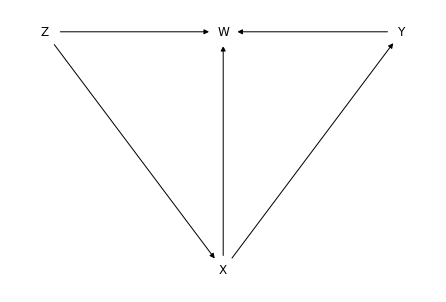

In [18]:
G = nx.DiGraph()
G.graph['dpi'] = 120

nodes = ['X', 'Y', 'Z', 'W']
edges = [('Z','W'), ('Z','X'), ('X','W'), ('X','Y'), ('Y','W')]
nodes_pos = {'Z':(-1, 1), 'X':(0, -1), 'W':(0, 1), 'Y':(1, 1)}
nodes_lbl = {'Z':'Z', 'X':'X', 'W':'W', 'Y':'Y'}

G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G,nodes_pos,node_size=800,node_color='white')
_ = nx.draw_networkx_labels(G,nodes_pos,nodes_lbl)

In order to verify if $P(Y\vert do(Z), do(X), W) = P(Y\vert do(X), W)$ we generate $G_{\overline{X},\overline{Z(W)}}$:

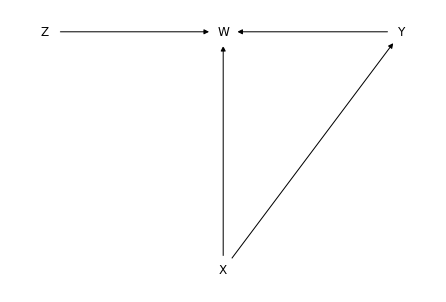

In [19]:
G = nx.DiGraph()
G.graph['dpi'] = 120

nodes = ['X', 'Y', 'Z', 'W']
edges = [('Z','W'), ('X','W'), ('X','Y'), ('Y','W')]
nodes_pos = {'Z':(-1, 1), 'X':(0, -1), 'W':(0, 1), 'Y':(1, 1)}
nodes_lbl = {'Z':'Z', 'X':'X', 'W':'W', 'Y':'Y'}

G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G,nodes_pos,node_size=800,node_color='white')
_ = nx.draw_networkx_labels(G,nodes_pos,nodes_lbl)

In the graph, it is **not** true that $Y \perp Z \vert X,W$ as the conditioning on $W$ opens a path from $Z$ to $Y$. Thus, Rule 3 does **not** hold.

# Exampe of Derivation (1)

We go through a formal derivation.

## Problem statement

Let $G$ be the following graph:

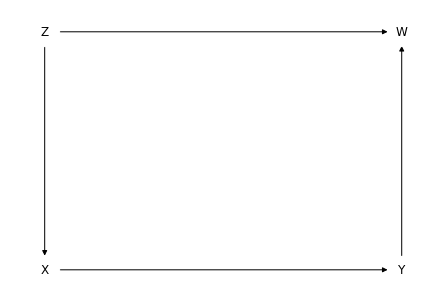

In [31]:
G = nx.DiGraph()
G.graph['dpi'] = 120

nodes = ['X', 'Y', 'Z', 'W']
edges = [('Z','X'), ('Z','W'), ('X','Y'), ('Y','W')]
nodes_pos = {'X':(-1, 1), 'Z':(-1, 1.2), 'W':(1, 1.2), 'Y':(1, 1)}
nodes_lbl = {'Z':'Z', 'X':'X', 'Y':'Y', 'W':'W'}

G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G,nodes_pos,node_size=800,node_color='white')
_ = nx.draw_networkx_labels(G,nodes_pos,nodes_lbl)

We want to find a formula for computing the causal-interventional quantity $P(Y\vert do(X))$ using only statistical-observational quantities.

## Derivation

**Start.** $$P(Y \vert do(X))$$

**Rule 2.** We start straight with Rule 2, trying to transfrom intervention $do(X)$ into observation $X$. We need to show whether $Y \perp X$ in $G_{\underline{X}}$:

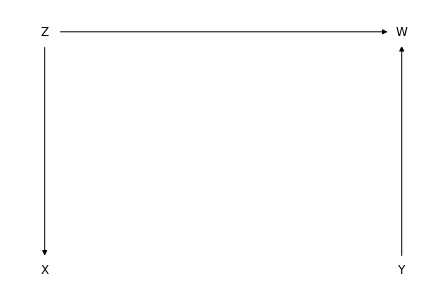

In [32]:
G = nx.DiGraph()
G.graph['dpi'] = 120

nodes = ['X', 'Y', 'Z', 'W']
edges = [('Z','X'), ('Z','W'), ('Y','W')]
nodes_pos = {'X':(-1, 1), 'Z':(-1, 1.2), 'W':(1, 1.2), 'Y':(1, 1)}
nodes_lbl = {'Z':'Z', 'X':'X', 'Y':'Y', 'W':'W'}

G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G,nodes_pos,node_size=800,node_color='white')
_ = nx.draw_networkx_labels(G,nodes_pos,nodes_lbl)

Independence $Y \perp X$ holds in virtue of the collider $W$, thus:
$$P(Y \vert X)$$
We have already reduced our interventional quantity to and observational one.

**QED.**

# Exampe of Derivation (2)

We go through another simple formal derivation.

## Problem statement

Let $G$ be the following graph:

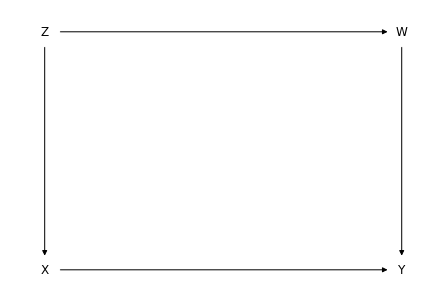

In [33]:
G = nx.DiGraph()
G.graph['dpi'] = 120

nodes = ['X', 'Y', 'Z', 'W']
edges = [('Z','X'), ('Z','W'), ('X','Y'), ('W','Y')]
nodes_pos = {'X':(-1, 1), 'Z':(-1, 1.2), 'W':(1, 1.2), 'Y':(1, 1)}
nodes_lbl = {'Z':'Z', 'X':'X', 'Y':'Y', 'W':'W'}

G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G,nodes_pos,node_size=800,node_color='white')
_ = nx.draw_networkx_labels(G,nodes_pos,nodes_lbl)

This instance is similar to the previous one, except that $W$ is now a mediator instead of a collider.

As before, we want to find a formula for computing the causal-interventional quantity $P(Y\vert do(X))$ using only statistical-observational quantities.

## Derivation

**Start.** $$P(Y \vert do(X))$$

**Rule 2.** We may want to start again with Rule 2, although it may be glimpsed that it will not work. Anyway, to transfrom intervention $do(X)$ into observation $X$ we need to show whether $Y \perp X$ in $G_{\underline{X}}$:

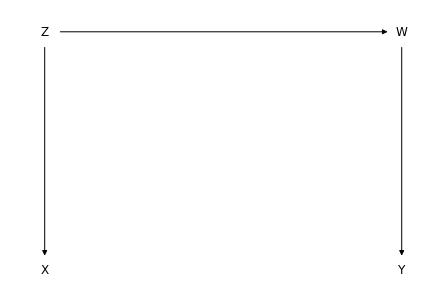

In [35]:
G = nx.DiGraph()
G.graph['dpi'] = 120

nodes = ['X', 'Y', 'Z', 'W']
edges = [('Z','X'), ('Z','W'), ('W','Y')]
nodes_pos = {'X':(-1, 1), 'Z':(-1, 1.2), 'W':(1, 1.2), 'Y':(1, 1)}
nodes_lbl = {'Z':'Z', 'X':'X', 'Y':'Y', 'W':'W'}

G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G,nodes_pos,node_size=800,node_color='white')
_ = nx.draw_networkx_labels(G,nodes_pos,nodes_lbl)

Now independence $Y \perp X$ does not hold because we have an open path from $X$ to $Y$. This suggest that we will need to close this path by conditioning on one of the nodes $Z$ or $W$. We will choose $W$ as the closest to our target.

**Sum rule.** Using $P(A)=\sum_B P(A,B)$:
$$\sum_W P(Y,W \vert do(X))$$

**Product rule.** Using $P(A,B)=P(A \vert B) P(B)$:
$$\sum_W P(Y \vert W, do(X)) P (W \vert do(X))$$

**Rule 2.** Let us now check using Rule 2 in order to transfrom intervention $do(X)$ into observation $X$. Let us start from the first term $P(Y \vert W, do(X))$ and show whether $Y \perp X \vert W$ in $G_{\underline{X}}$:

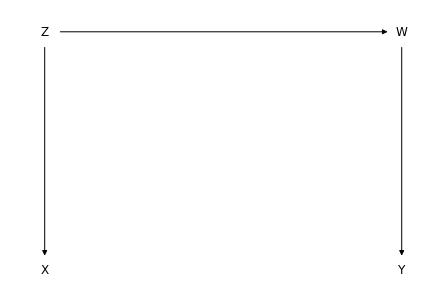

In [35]:
G = nx.DiGraph()
G.graph['dpi'] = 120

nodes = ['X', 'Y', 'Z', 'W']
edges = [('Z','X'), ('Z','W'), ('W','Y')]
nodes_pos = {'X':(-1, 1), 'Z':(-1, 1.2), 'W':(1, 1.2), 'Y':(1, 1)}
nodes_lbl = {'Z':'Z', 'X':'X', 'Y':'Y', 'W':'W'}

G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G,nodes_pos,node_size=800,node_color='white')
_ = nx.draw_networkx_labels(G,nodes_pos,nodes_lbl)

Independence $Y \perp X \vert W$ holds, thus:
$$\sum_W P(Y \vert W, X) P (W \vert do(X))$$

**Rule 2.** Let us apply Rule 2 again to the second term $P(W\vert do(X))$ in order to transfrom intervention $do(X)$ into observation $X$. Let us whether $W \perp X$ in $G_{\underline{X}}$:

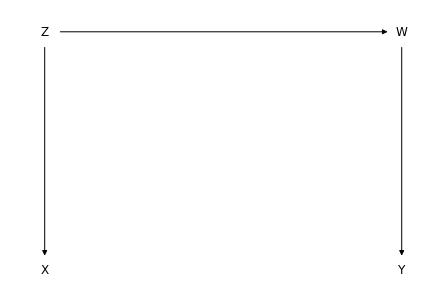

In [35]:
G = nx.DiGraph()
G.graph['dpi'] = 120

nodes = ['X', 'Y', 'Z', 'W']
edges = [('Z','X'), ('Z','W'), ('W','Y')]
nodes_pos = {'X':(-1, 1), 'Z':(-1, 1.2), 'W':(1, 1.2), 'Y':(1, 1)}
nodes_lbl = {'Z':'Z', 'X':'X', 'Y':'Y', 'W':'W'}

G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G,nodes_pos,node_size=800,node_color='white')
_ = nx.draw_networkx_labels(G,nodes_pos,nodes_lbl)

Independence $W \perp X$ here does not hold. Let us try to use another rule.

**Rule 3.** Let us try with Rule 3 applied to $P(W\vert do(X))$ in order to drop intervention $do(X)$. Let us whether $W \perp X$ in $G_{\overline{X(\emptyset)}}$:

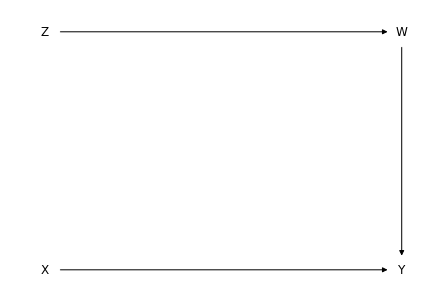

In [36]:
G = nx.DiGraph()
G.graph['dpi'] = 120

nodes = ['X', 'Y', 'Z', 'W']
edges = [('X','Y'), ('Z','W'), ('W','Y')]
nodes_pos = {'X':(-1, 1), 'Z':(-1, 1.2), 'W':(1, 1.2), 'Y':(1, 1)}
nodes_lbl = {'Z':'Z', 'X':'X', 'Y':'Y', 'W':'W'}

G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G,nodes_pos,node_size=800,node_color='white')
_ = nx.draw_networkx_labels(G,nodes_pos,nodes_lbl)

Independence $W \perp X$ now holds because of the collider $Y$. Let us try to use another rule. We then have 
$$\sum_W P(Y \vert W, X) P (W),$$
a purely statistical quantity.

**QED.**

# Derivation of Back-Door Criterion

We go through the formal derivation of the back-door criterion following [2].

## Problem statement

Let $G$ be the following graph:

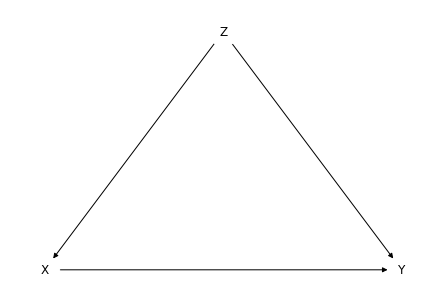

In [21]:
G = nx.DiGraph()
G.graph['dpi'] = 120

nodes = ['X', 'Y', 'Z']
edges = [('Z','X'), ('Z','Y'), ('X','Y')]
nodes_pos = {'X':(-1, 1), 'Z':(0, 1.2), 'Y':(1, 1)}
nodes_lbl = {'Z':'Z', 'X':'X', 'Y':'Y'}

G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G,nodes_pos,node_size=800,node_color='white')
_ = nx.draw_networkx_labels(G,nodes_pos,nodes_lbl)

We are interested in the quantity: $$P(Y \vert do(X))$$ and we want to show that it is equivalent to: 
$$ \sum_Z P(Y \vert X,Z) P(Z) $$

## Derivation

**Start.** $$P(Y \vert do(X))$$

**Sum rule.** Using $P(A)=\sum_B P(A,B)$:
$$\sum_Z P(Y,Z \vert do(X))$$

**Product rule.** Using $P(A,B)=P(A \vert B) P(B)$:
$$\sum_Z P(Y \vert Z, do(X)) P (Z \vert do(X))$$

**Rule 2.** We want to use Rule 2 to transfrom intervention $do(X)$ into observation $X$ in the first term $P(Y \vert Z, do(X))$. We need to show whether $Y \perp X \vert Z$ in $G_{\underline{X}}$:

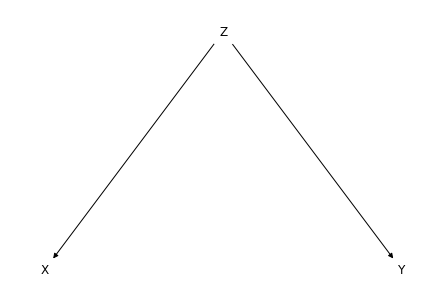

In [22]:
G = nx.DiGraph()
G.graph['dpi'] = 120

nodes = ['X', 'Y', 'Z']
edges = [('Z','X'), ('Z','Y')]
nodes_pos = {'X':(-1, 1), 'Z':(0, 1.2), 'Y':(1, 1)}
nodes_lbl = {'Z':'Z', 'X':'X', 'Y':'Y'}

G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G,nodes_pos,node_size=800,node_color='white')
_ = nx.draw_networkx_labels(G,nodes_pos,nodes_lbl)

Independence $Y \perp X \vert Z$ holds, thus:
$$\sum_Z P(Y \vert Z, X) P (Z \vert do(X))$$

**Rule 3.** We use Rule 3 to drop intervention $do(X)$ in the last term $P(Z \vert do(X))$. We need to show whether $Z \perp X$ in $G_{\overline{X(\emptyset)}}$:

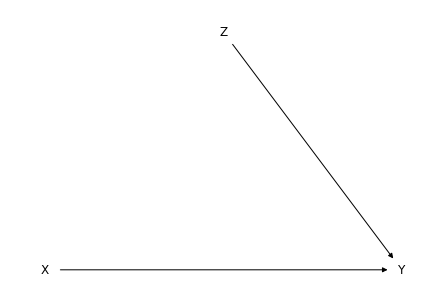

In [23]:
G = nx.DiGraph()
G.graph['dpi'] = 120

nodes = ['X', 'Y', 'Z']
edges = [('Z','Y'), ('X','Y')]
nodes_pos = {'X':(-1, 1), 'Z':(0, 1.2), 'Y':(1, 1)}
nodes_lbl = {'Z':'Z', 'X':'X', 'Y':'Y'}

G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G,nodes_pos,node_size=800,node_color='white')
_ = nx.draw_networkx_labels(G,nodes_pos,nodes_lbl)

Independence $Z \perp X$ holds, thus:
$$\sum_Z P(Y \vert Z, X) P (Z)$$

**QED.**

# Derivation of Front-Door Criterion

We go through the formal derivation of the front-door criterion following [1].

## Problem statement

Let $G$ be the following graph:

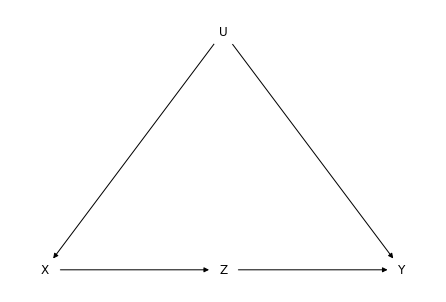

In [24]:
G = nx.DiGraph()
G.graph['dpi'] = 120

nodes = ['X', 'Y', 'Z', 'U']
edges = [('U','X'), ('U','Y'), ('X','Z'), ('Z','Y')]
nodes_pos = {'X':(-1, 1), 'U':(0, 1.2), 'Z':(0, 1), 'Y':(1, 1)}
nodes_lbl = {'Z':'Z', 'X':'X', 'U':'U', 'Y':'Y'}

G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G,nodes_pos,node_size=800,node_color='white')
_ = nx.draw_networkx_labels(G,nodes_pos,nodes_lbl)

We are interested in the quantity: $$P(Y \vert do(X))$$ and we want to show that it is equivalent to: 
$$ \sum_Z P(Z \vert X) 
\sum_{X'} P(Y \vert Z,X')P(X')$$

## Derivation

**Start.** $$P(Y \vert do(X))$$

**Sum rule.** Using $P(A)=\sum_B P(A,B)$:
$$\sum_Z P(Y,Z \vert do(X))$$

**Product rule.** Using $P(A,B)=P(A \vert B) P(B)$:
$$\sum_Z P(Y \vert Z, do(X)) P (Z \vert do(X))$$

**Rule 2.** We want to use Rule 2 to transfrom intervention $do(X)$ into observation $X$. Let us start from the second term $P(Z \vert do(X))$. We need to show whether $Z \perp X$ in $G_{\underline{X}}$:

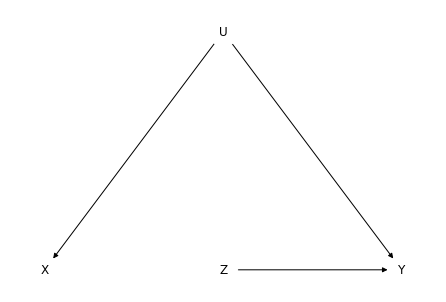

In [25]:
G = nx.DiGraph()
G.graph['dpi'] = 120

nodes = ['X', 'Y', 'Z', 'U']
edges = [('U','X'), ('U','Y'), ('Z','Y')]
nodes_pos = {'X':(-1, 1), 'U':(0, 1.2), 'Z':(0, 1), 'Y':(1, 1)}
nodes_lbl = {'Z':'Z', 'X':'X', 'U':'U', 'Y':'Y'}

G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G,nodes_pos,node_size=800,node_color='white')
_ = nx.draw_networkx_labels(G,nodes_pos,nodes_lbl)

Independence $Z \perp X$ holds, thus:
$$\sum_Z P(Y \vert Z, do(X)) P (Z \vert X)$$

**Rule 2.** We want to apply Rule 2 again, but this time to the first term $P(Y \vert Z, do(X))$ in order to transform the observation $Z$ into an intervention $do(Z)$. We need to show whether $Y \perp Z \vert X$ in $G_{\underline{Z},\overline{X}}$:

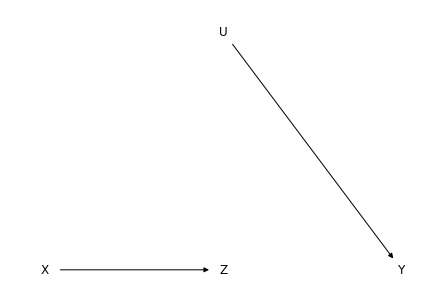

In [26]:
G = nx.DiGraph()
G.graph['dpi'] = 120

nodes = ['X', 'Y', 'Z', 'U']
edges = [('U','Y'), ('X','Z')]
nodes_pos = {'X':(-1, 1), 'U':(0, 1.2), 'Z':(0, 1), 'Y':(1, 1)}
nodes_lbl = {'Z':'Z', 'X':'X', 'U':'U', 'Y':'Y'}

G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G,nodes_pos,node_size=800,node_color='white')
_ = nx.draw_networkx_labels(G,nodes_pos,nodes_lbl)

Independence $Y \perp Z \vert X$ holds, thus:
$$\sum_Z P(Y \vert do(Z), do(X)) P (Z \vert X)$$

**Sum rule.** Using $P(A)=\sum_B P(A,B)$:
$$\sum_{Z,U} P(Y,U \vert do(Z), do(X)) P (Z \vert X)$$

**Product rule.** Using $P(A,B)=P(A \vert B) P(B)$:
$$\sum_{Z,U} P(Y \vert U, do(Z), do(X)) P(U \vert do(Z), do(X)) P(Z \vert X)$$

**Rule 3.** We want to use Rule 3 to drop intervention $do(X)$. Let us start from the first term $P(Y \vert U, do(Z), do(X))$. We need to show whether $Y \perp X \vert U,Z$ in $G_{\overline{Z},\overline{X(U)}}$:

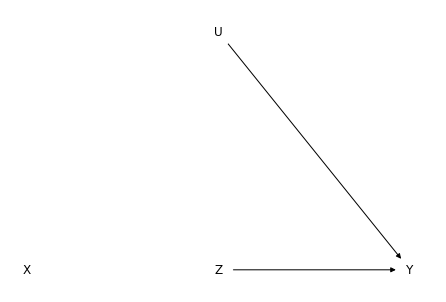

In [27]:
G = nx.DiGraph()
G.graph['dpi'] = 120

nodes = ['X', 'Y', 'Z', 'U']
edges = [('U','Y'), ('Z','Y')]
nodes_pos = {'X':(-1, 1), 'U':(0, 1.2), 'Z':(0, 1), 'Y':(1, 1)}
nodes_lbl = {'Z':'Z', 'X':'X', 'U':'U', 'Y':'Y'}

G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G,nodes_pos,node_size=800,node_color='white')
_ = nx.draw_networkx_labels(G,nodes_pos,nodes_lbl)

Independence $Y \perp X \vert U,Z$ holds, thus:
$$\sum_{Z,U} P(Y \vert U, do(Z)) P(U \vert do(Z), do(X)) P(Z \vert X)$$

**Rule 3.** We use Rule 3 to drop again intervention $do(X)$ in the second term $P(U \vert do(Z), do(X))$. We need to show whether $U \perp X \vert Z$ in $G_{\overline{Z},\overline{X(\emptyset)}}$:

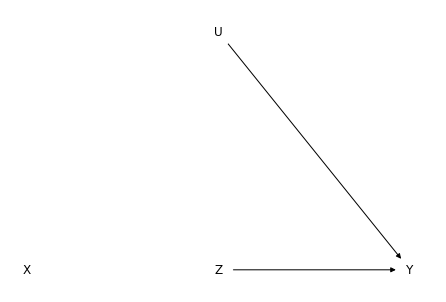

In [28]:
G = nx.DiGraph()
G.graph['dpi'] = 120

nodes = ['X', 'Y', 'Z', 'U']
edges = [('U','Y'), ('Z','Y')]
nodes_pos = {'X':(-1, 1), 'U':(0, 1.2), 'Z':(0, 1), 'Y':(1, 1)}
nodes_lbl = {'Z':'Z', 'X':'X', 'U':'U', 'Y':'Y'}

G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G,nodes_pos,node_size=800,node_color='white')
_ = nx.draw_networkx_labels(G,nodes_pos,nodes_lbl)

Independence $U \perp X \vert Z$ holds, thus:
$$\sum_{Z,U} P(Y \vert U, do(Z)) P(U \vert do(Z)) P(Z \vert X)$$

**Product rule.** Using $P(A,B)=P(A \vert B) P(B)$:
$$\sum_{Z,U} P(Y, U \vert do(Z)) P(Z \vert X)$$

**Sum rule.** Using $P(A)=\sum_B P(A,B)$:
$$\sum_{Z} P(Y \vert do(Z)) P(Z \vert X)$$

**Sum rule.** Using $P(A)=\sum_B P(A,B)$:
$$\sum_{Z} P(Z \vert X) \sum_{X'} P(Y, X' \vert do(Z)) $$

**Product rule.** Using $P(A,B)=P(A \vert B) P(B)$:
$$\sum_{Z} P(Z \vert X) \sum_{X'} P(Y \vert X', do(Z)) P(X' \vert do(Z)) $$

**Rule 2.** We want to use Rule 2 to transfrom intervention $do(Z)$ into observation $Z$ in the second term $P(Y \vert X', do(Z))$. We need to show whether $Y \perp Z \vert X'$ in $G_{\underline{Z}}$:

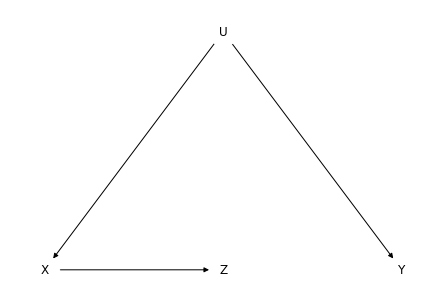

In [29]:
G = nx.DiGraph()
G.graph['dpi'] = 120

nodes = ['X', 'Y', 'Z', 'U']
edges = [('U','X'), ('U','Y'), ('X','Z')]
nodes_pos = {'X':(-1, 1), 'U':(0, 1.2), 'Z':(0, 1), 'Y':(1, 1)}
nodes_lbl = {'Z':'Z', 'X':'X', 'U':'U', 'Y':'Y'}

G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G,nodes_pos,node_size=800,node_color='white')
_ = nx.draw_networkx_labels(G,nodes_pos,nodes_lbl)

Independence $Y \perp Z \vert X'$ holds, thus:
$$\sum_{Z} P(Z \vert X) \sum_{X'} P(Y \vert X', Z) P(X' \vert do(Z)) $$

**Rule 3.** We use Rule 3 to drop intervention $do(Z)$ in the last term $P(X' \vert do(Z))$. We need to show whether $X' \perp Z$ in $G_{\overline{Z(\emptyset)}}$:

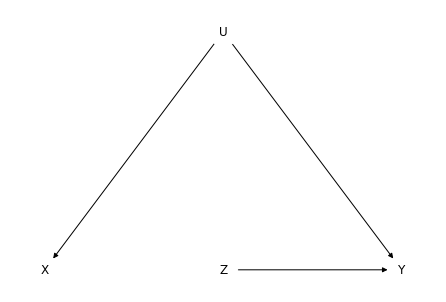

In [30]:
G = nx.DiGraph()
G.graph['dpi'] = 120

nodes = ['X', 'Y', 'Z', 'U']
edges = [('U','X'), ('U','Y'), ('Z','Y')]
nodes_pos = {'X':(-1, 1), 'U':(0, 1.2), 'Z':(0, 1), 'Y':(1, 1)}
nodes_lbl = {'Z':'Z', 'X':'X', 'U':'U', 'Y':'Y'}

G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G,nodes_pos,node_size=800,node_color='white')
_ = nx.draw_networkx_labels(G,nodes_pos,nodes_lbl)

Independence $X' \perp Z$ holds, thus:
$$\sum_{Z} P(Z \vert X) \sum_{X'} P(Y \vert X', Z) P(X') $$

**QED.**

# References

\[1\] Stephen Malina, [Deriving the front-door criterion with the do-calculus](https://stephenmalina.com/post/2020-03-09-front-door-do-calc-derivation/)

\[2\] Andrew Heiss, [Do-calculus adventures! Exploring the three rules of do-calculus in plain language and deriving the backdoor adjustment formula by hand](https://www.andrewheiss.com/blog/2021/09/07/do-calculus-backdoors/)

\[3\] Brady Neal, [Introduction to Causal Inference](https://www.bradyneal.com/causal-inference-course)